In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('shop data.csv')

In [5]:
df

,age,income,gender,m_status,buys
0,<25,high,male,single,Bad
1,<25,high,male,married,Bad
2,25-35,high,male,single,Good
3,>35,medium,male,single,Good
4,>35,low,female,single,Good
5,>35,low,female,single,Bad
6,25-35,low,female,married,Good
7,<25,medium,male,married,Bad
8,<25,low,female,single,Good
9,>35,medium,female,married,Good


In [6]:
x = df.drop('buys', axis=1) 

In [7]:
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [8]:
#y = df.iloc[:,4]
y = df.buys

In [9]:
y

0      Bad
1      Bad
2     Good
3     Good
4     Good
5      Bad
6     Good
7      Bad
8     Good
9     Good
10    Good
11    Good
12    Good
13     Bad
14     Bad
15    Good
16    Good
17    Good
18    Good
19    Good
20     Bad
21    Good
Name: buys, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le_x = LabelEncoder()
x = x.apply(le_x.fit_transform) # it is used to convert the string labels into numbers, so that the algorithm can understand how to operate on them. 

In [12]:
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=9)

In [14]:
xtrain

,age,income,gender,m_status
18,0,2,0,0
16,2,2,1,0
6,0,1,0,0
2,0,0,1,1
13,2,2,1,0
15,1,0,0,0
10,1,2,0,1
19,0,0,1,1
11,0,2,1,0
14,1,0,1,1


In [15]:
xtest

,age,income,gender,m_status
4,2,1,0,1
9,2,2,0,0
5,2,1,0,1
3,2,2,1,1
7,1,2,1,0


In [16]:
ytest

4    Good
9    Good
5     Bad
3    Good
7     Bad
Name: buys, dtype: object

In [17]:
ytrain

18    Good
16    Good
6     Good
2     Good
13     Bad
15    Good
10    Good
19    Good
11    Good
14     Bad
12    Good
0      Bad
20     Bad
17    Good
8     Good
1      Bad
21    Good
Name: buys, dtype: object

In [18]:
from sklearn.tree import DecisionTreeClassifier
dect = DecisionTreeClassifier()
dect.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [19]:
dect.predict(xtest)

array(['Bad', 'Bad', 'Bad', 'Good', 'Bad'], dtype=object)

In [20]:
ytest

4    Good
9    Good
5     Bad
3    Good
7     Bad
Name: buys, dtype: object

In [21]:
dect.score(xtest, ytest)

0.6

**Performance using cross_val_score**

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
result = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
result

array([0.6 , 0.6 , 0.75, 0.25, 0.5 ])

In [24]:
result.mean()

np.float64(0.54)

In [25]:
from sklearn.linear_model import LogisticRegression
result = cross_val_score(LogisticRegression(), x, y, cv=7)
result

array([0.5       , 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667])

In [26]:
result.mean()

np.float64(0.6428571428571427)

In [27]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()

x_scaled = MMS.fit_transform(x)
x_scaled

array([[0.5, 0. , 1. , 1. ],
       [0.5, 0. , 1. , 0. ],
       [0. , 0. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 0.5, 0. , 1. ],
       [1. , 0.5, 0. , 1. ],
       [0. , 0.5, 0. , 0. ],
       [0.5, 1. , 1. , 0. ],
       [0.5, 0.5, 0. , 1. ],
       [1. , 1. , 0. , 0. ],
       [0.5, 1. , 0. , 1. ],
       [0. , 1. , 1. , 0. ],
       [0. , 0. , 0. , 1. ],
       [1. , 1. , 1. , 0. ],
       [0.5, 0. , 1. , 1. ],
       [0.5, 0. , 0. , 0. ],
       [1. , 1. , 1. , 0. ],
       [0.5, 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 1. ],
       [1. , 1. , 0. , 0. ],
       [0.5, 0.5, 1. , 1. ]])

In [28]:
from sklearn.neighbors import KNeighborsClassifier
result = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_scaled, y, cv=6)
result

array([0.75      , 0.75      , 0.75      , 0.75      , 0.66666667,
       0.        ])

In [29]:
result.mean()

np.float64(0.611111111111111)

In [30]:
aa = dect.predict([[2,2,1,2]])
aa

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Good'], dtype=object)

In [31]:
y_predict = dect.predict(xtest)
y_predict

array(['Bad', 'Bad', 'Bad', 'Good', 'Bad'], dtype=object)

In [32]:
ytest

4    Good
9    Good
5     Bad
3    Good
7     Bad
Name: buys, dtype: object

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [34]:
cm = confusion_matrix(ytest,y_predict) # to determine the performance of the classification model
cm

array([[2, 0],
       [2, 1]])

In [35]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Bad', 'Good']) #[True, False]
cm_display

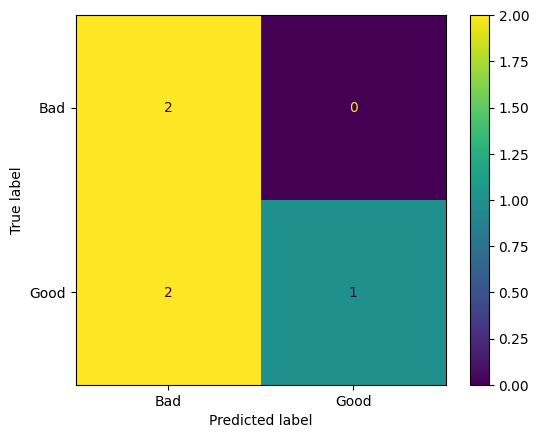

In [36]:
cm_display.plot()

In [37]:
metrics.accuracy_score(ytest,y_predict)

0.6

In [38]:
metrics.precision_score(ytest,y_predict, average=None)

array([0.5, 1. ])

In [39]:
metrics.recall_score(ytest,y_predict, average=None)

array([1.        , 0.33333333])

In [40]:
metrics.f1_score(ytest,y_predict, average=None)

array([0.66666667, 0.5       ])

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

         Bad       0.50      1.00      0.67         2
        Good       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



In [43]:
#xinput = np.array([1,0,0,1])
xinput = np.array([1,0,1,1])

In [44]:
y_predict = dect.predict([xinput])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
y_predict

array(['Bad'], dtype=object)